# Tutorial 09: Spatially varying parameters 2

In this notebook, one data point from Figure 2 in [Beg *et al.* Stable and manipulable Bloch point. *Scientific Reports*, **9**, 7959 (2019)](https://doi.org/10.1038/s41598-019-44462-2) is simulated.

We need to relax a $150 \,\text{nm}$ disk, which consists of two layers with different sign of Dzyaloshinskii-Moriya constant $D$. The bottom layer with $D<0$ has $20 \,\text{nm}$ thickness, whereas the top layer with $D>0$ has $10 \,\text{nm}$ thickness. We start by importing the necessary modules and creating the mesh with two regions.

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
%matplotlib inline

d = 150e-9
hb = 20e-9
ht = 10e-9
cell = (5e-9, 5e-9, 2.5e-9)
n = (31, 31, 5)
subregions = {'r1': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)),
              'r2': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))}
p1 = (-d/2, -d/2, -hb)
p2 = (d/2, d/2, ht)
mesh = df.Mesh(p1=p1, p2=p2, n=n, subregions=subregions)

The mesh domain and the discretisation cells are:

In [2]:
mesh.k3d()

Output()

or using `matplotlib`:

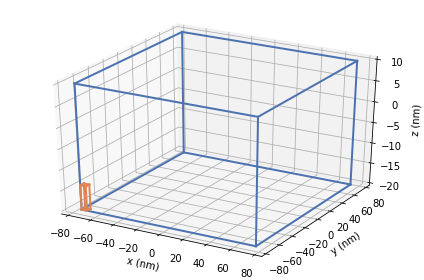

In [3]:
mesh.mpl()

and the two regions we defined are:

In [4]:
mesh.k3d_subregions()

Output()

Now, we need to define the system object, and by setting magnetisation saturation, set the geometry to be a disk.

In [8]:
D = {'r1': 1.58e-3, 'r2': -1.58e-3, 'r1:r2': 1.58e-9}
Ms = 3.84e5
A = 8.78e-12

def Ms_fun(pos):
    x, y, z = pos
    if x**2 + y**2 <= (d/2)**2:
        return Ms
    else:
        return 0

system = mm.System(name='bloch_point')
system.energy = mm.Exchange(A=A) + mm.DMI(D=D, crystalclass='T') + mm.Demag()
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms_fun)

Our sample is now:

In [9]:
system.m.norm.k3d_nonzero()

Output()

The magnetisation in the horizontal cross-section is:

In [11]:
system.m.plane('z', n=(20, 20)).k3d_vectors(head_size=30)

Output()

or using `matplotlib`:

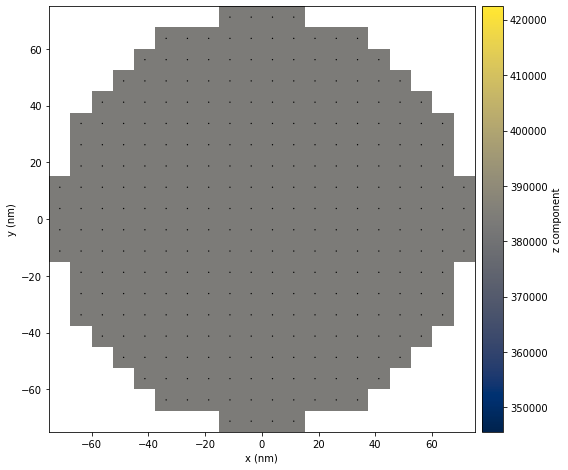

In [12]:
system.m.plane('z', n=(20, 20)).mpl(figsize=(8, 8))

Now, we can minimise the system's energy by using `MinDriver`.

In [13]:
md = oc.MinDriver()
md.drive(system, overwrite=True)

Running OOMMF (ExeOOMMFRunner) [2020/05/04 09:26]... (2.1 s)


The out-of-plane magnetisation component ($m_{z}$) is now:

In [15]:
system.m.z.k3d_voxels(filter_field=system.m.norm)

Output()

We can see that two vortices with different orientation emerged. We can inspect this closer by plotting two layers of magnetisation in two different layers:

In [16]:
import k3d
plot = k3d.plot()
system.m.plane(z=-10e-9, n=(20, 20)).k3d_vectors(plot=plot, color_field=system.m.z, head_size=30)
system.m.plane(z=5e-9, n=(20, 20)).k3d_vectors(plot=plot,color_field=system.m.z, head_size=30)
plot.display()

Output()

We can now plot another cross section and see that the Bloch point emerged.

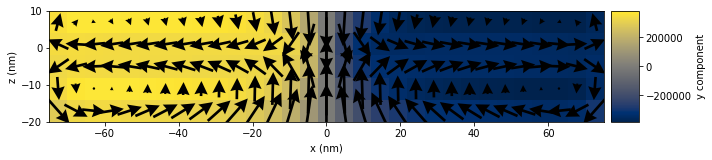

In [17]:
system.m.plane('y').mpl(figsize=(10, 5))

In [18]:
system.m.plane('y').k3d_vectors(color_field=system.m.z, head_size=30)

Output()

In [19]:
system.m.z.plane('y').k3d_voxels(color_field=system.m.z)

Output()